## Data

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import imblearn
import collections
from imblearn.over_sampling import SMOTE
from sklearn.svm import LinearSVC
from imblearn.over_sampling import ADASYN

In [2]:
df = pd.read_csv('/Users/claudiajovellar/code/AlcaRmsp/the_laundromat/raw_data/data.csv')

df = df.rename(columns={'oldbalanceOrg':'oldBalanceOrig', 'newbalanceOrig':'newBalanceOrig', \
                        'oldbalanceDest':'oldBalanceDest', 'newbalanceDest':'newBalanceDest'})

In [3]:
df['errorBalanceOrig']=df['newBalanceOrig'] + df['amount'] - df['oldBalanceOrig']
df['errorBalanceDest']=df['newBalanceDest'] + df['amount'] - df['oldBalanceDest']

In [4]:
from sklearn.preprocessing import OrdinalEncoder

# Instantiate the Ordinal Encoder
ordinal_encoder = OrdinalEncoder()

# Fit it
ordinal_encoder.fit(df[["type"]])

# Display the learned categories
display(ordinal_encoder.categories_)

# Transforming categories into ordered numbers
df["type"] = ordinal_encoder.transform(df[["type"]])

[array(['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER'],
       dtype=object)]

In [5]:
from sklearn.preprocessing import LabelEncoder
# create a label encoder object
le = LabelEncoder()

# apply the label encoder to non-numeric columns
df['nameOrig'] = le.fit_transform(df['nameOrig'])
df['nameDest'] = le.fit_transform(df['nameDest'])

In [6]:
df.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
0,1,3.0,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0,0.0,9839.64
1,1,3.0,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0,0.0,1864.28
2,1,4.0,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0,0.0,181.00
3,1,1.0,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0,0.0,-21001.00
4,1,3.0,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0,0.0,11668.14


### Split data

In [7]:
# Separate the features and target variable
X = df.drop('isFraud', axis=1)
y = df['isFraud']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Balancing data

### SMOTE

([<matplotlib.patches.Wedge at 0x1307de500>,
 [Text(-1.099990955625572, 0.004460666087110192, 'Not Fraud'),
  Text(1.0999909559371663, -0.004460589247970448, 'Fraud')])

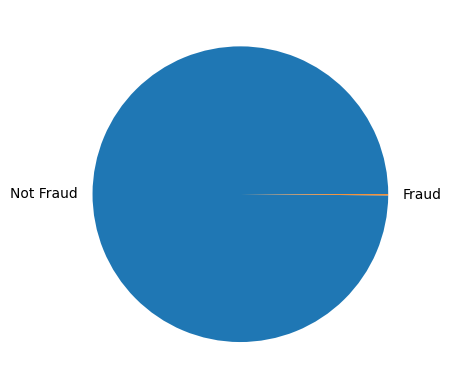

In [9]:
#Check if data is balanced before SMOTE
labels = 'Not Fraud','Fraud'
values=df['isFraud'].value_counts()
fig, ax = plt.subplots()
ax.pie(values, labels=labels)

In [10]:
print(imblearn.__version__)

0.9.1


In [11]:
# summarize class distribution
counter = collections.Counter(y)
print(counter)

Counter({0: 6354407, 1: 8213})


In [12]:
X_train.shape, y_train.shape

((5090096, 12), (5090096,))

In [13]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [14]:
X_resampled.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
0,619,0.0,386385.08,4449199,4669568.85,5055953.92,289167,506035.06,119649.98,0,772770.15,0.00
1,164,0.0,212458.78,5813773,234635.00,447093.78,204382,806037.88,593579.10,0,424917.56,0.00
2,382,3.0,19967.60,5870502,3634.00,0.00,1346491,0.00,0.00,0,16333.60,19967.60
3,180,1.0,527616.51,5095916,180216.00,0.00,446948,92157.10,619773.61,0,347400.51,1055233.02
4,36,4.0,206067.85,5557736,0.00,0.00,338417,2131494.48,2337562.32,0,206067.85,412135.69


In [15]:
X_resampled.shape, y_resampled.shape

((10167006, 12), (10167006,))

In [16]:
pd.DataFrame(y_resampled)

,isFraud
0,0
1,0
2,0
3,0
4,0
...,...
10167001,1
10167002,1
10167003,1
10167004,1


In [17]:
X_resampled['isFraud'] = y_resampled

([<matplotlib.patches.Wedge at 0x134af2fb0>,
 [Text(6.735557395310444e-17, 1.1, 'Not Fraud'),
  Text(-2.0206672185931328e-16, -1.1, 'Fraud')])

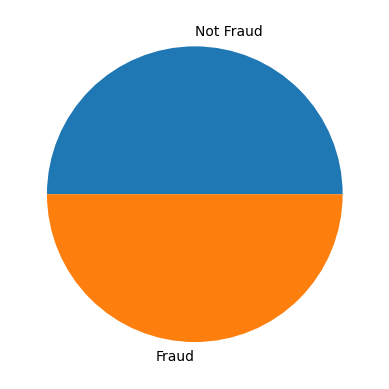

In [18]:
#Check if data is balanced after SMOTE balancing
labels = 'Not Fraud','Fraud'
values=X_resampled['isFraud'].value_counts()
fig, ax = plt.subplots()
ax.pie(values, labels=labels)

([<matplotlib.patches.Wedge at 0x135eea020>,
 [Text(6.735557395310444e-17, 1.1, 'Not Fraud'),
  Text(-2.0206672185931328e-16, -1.1, 'Fraud')])

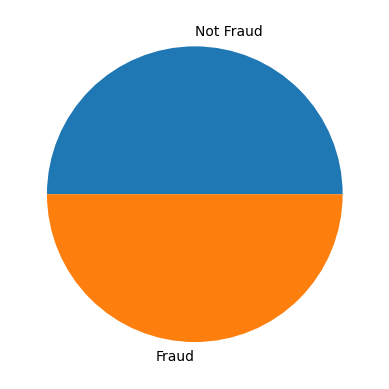

In [19]:
#Check if data is balanced after SMOTE balancing
import matplotlib.pyplot as plt
labels = 'Not Fraud','Fraud'
values=X_resampled['isFraud'].value_counts()
fig, ax = plt.subplots()
ax.pie(values, labels=labels)

### ADASYN

In [20]:
X_resampled_ADASYN, y_resampled_ADASYN = ADASYN().fit_resample(X_train, y_train)

In [21]:
X_resampled_ADASYN['isFraud'] = y_resampled_ADASYN

([<matplotlib.patches.Wedge at 0x1242ea8c0>,
 [Text(-7.724207452182517e-05, 1.099999997288028, 'Not Fraud'),
  Text(7.713908508922867e-05, -1.0999999972952552, 'Fraud')])

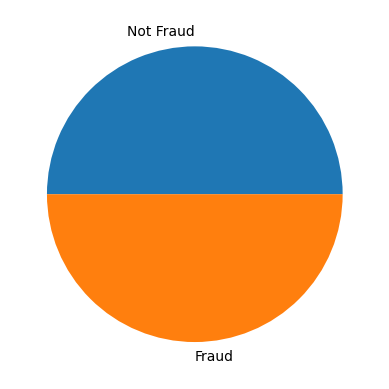

In [22]:
#Check if data is balanced after ADASYN balancing
import matplotlib.pyplot as plt
labels = 'Not Fraud','Fraud'
values=X_resampled_ADASYN['isFraud'].value_counts()
fig, ax = plt.subplots()
ax.pie(values, labels=labels)

## Modelling

### SMOTE - Instantiate the Random Forest Classifier model

In [23]:
X_train1 = X_resampled.drop('isFraud', axis = 1)
y_train1 = X_resampled['isFraud']

In [24]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [ ]:
#Train the model on the Training Data = X_resampled and y_resampled
model.fit(X_train1, y_train1)

In [ ]:
y_pred = model.predict(X_test)

### SMOTE - Score model on test data

In [ ]:
# Score the model on the Test data
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

### ADASYN - Intantiate the Random Forest Classifier model

In [ ]:
X_train_A = X_resampled.drop('isFraud', axis = 1)
y_train_A = X_resampled['isFraud']

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train_A, y_train_A)

In [ ]:
y_pred = model.predict(X_test)

### ADASYN - Score model on test data

In [ ]:
# Score the model on the Test data
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

## Feature Importance

### SMOTE

In [ ]:
from sklearn.inspection import permutation_importance
RFC_model = RandomForestClassifier().fit(X_train1, y_train1) # Fit model
permutation_score = permutation_importance(RFC_model, X_train1, y_train1, n_repeats=10, scoring = 'recall') # Perform Permutation"
importance_df = pd.DataFrame(np.vstack((X.columns, permutation_score.importances_mean)).T) # Unstack results"
importance_df.columns=['feature','score_decrease']
importance_df.sort_values(by='score_decrease', ascending = False) # Order by importance"